# Data Overview

Primeiramente, podemos visualizar os dados do dataset e entender melhor o que eles mostram sobre os passageiros. Podemos começar vendo o formato do dataset, as colunas que ele possui e os tipos dos dados.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading data files
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Através dos resultados acima, conseguimos algumas informações bastante valiosas: temos 11 colunas de informações sobre os passageiros: *PassengerId*, *Survived*, *Pclass*, *Name*, *Sex*, *Age*, *SibSP*, *Parch*, *Ticket*, *Cabin*, *Embarked* and *Fare*; sendo a maioria delas compostas por números. 

Vemos também que a coluna *Cabin* tem apenas 204 das 891 linhas preenchidas.

Pela descrição, podemos deduzir também que a maioria dos passageiros era da terceira classe (*Pclass*), com média de idade de aproximadamente 30 anos e que pagaram valores baixos pela passagem (*Fare*).

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Analysis

Podemos fazer uma análise mais profunda dos dados, para entendê-los melhor e saber quais podem ser mais úteis no treinamento do modelo. Podemos verificar a proporção de sobreviventes de acordo com cada feature para entender quais delas podem ter influenciado na sobrevivência.

### Número de sobreviventes

Primeiramente são definidas algumas funções para auxiliar no plot dos gráficos.

In [7]:
def plot_bar_chart(dataset, feature, stacked = True):
    
    survived = dataset[dataset["Survived"] == 1][feature].value_counts()
    dead = dataset[dataset["Survived"] == 0][feature].value_counts()
    
    dataframe = pd.DataFrame([survived, dead])
    dataframe.index = ["Survived", "Died"]
    dataframe.plot(kind = "bar", stacked = stacked, figsize = (8,8))

In [8]:
def plot_distribution(dataset, feature, title, bins = 20, hist = True, fsize = (8,8)):
    
    fig, ax = plt.subplots(figsize = fsize)
    ax.set_title(title)
    sns.distplot(dataset[feature], color = "b", bins = bins, ax = ax)


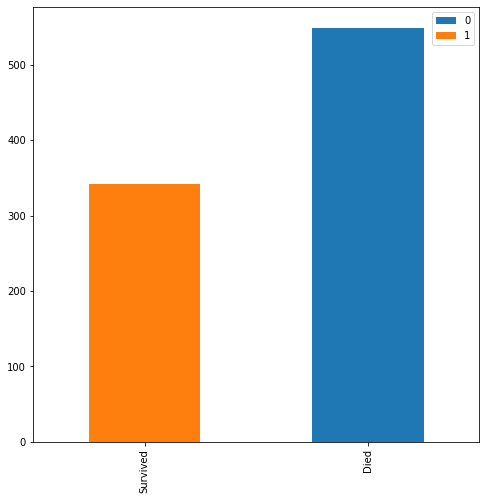

In [9]:
plot_bar_chart(train_data, "Survived")

In [10]:
train_data["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [11]:
train_data.groupby("Sex").Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


Olhando para os dados de treinamento, vemos que cerca de 65% dos passageiros era homem, porém entre os sobreviventes prevalecem as mulheres, compondo cerca de 74% deles.

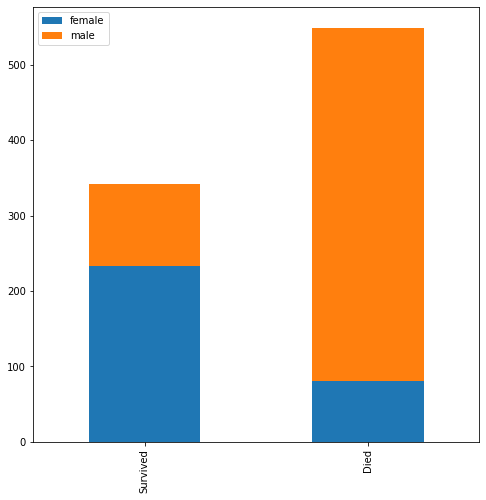

In [12]:
plot_bar_chart(train_data, "Sex")

O gráfico acima mostra a relação entre passageiros sobreviventes e sexo. É possível ver claramente que homens foram grande maioria entre os mortos.

Podemos analizar se havia alguma relação entre sobrevivência e classe ocupada pelo passageiro. Para isso, podemos visualizar a proporção de sobreviventes e mortos por classe.

In [13]:
train_data.groupby(["Pclass"]).Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


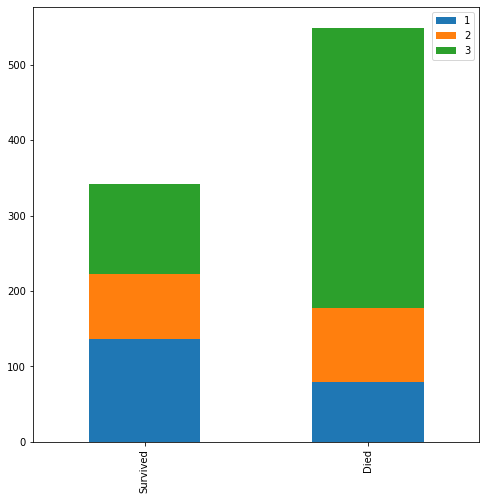

In [14]:
plot_bar_chart(train_data, "Pclass")

Vemos que entre os mortos, a grande maioria pertencia à terceira classe. Quase 60% dos passageiros da primeira classe sobreviveram e cerca de 50% dos passageiros da segunda classe também.

É possível analizar também se a idade dos passageiros teve alguma influência na sua sobrevivência.

/home/carolps/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


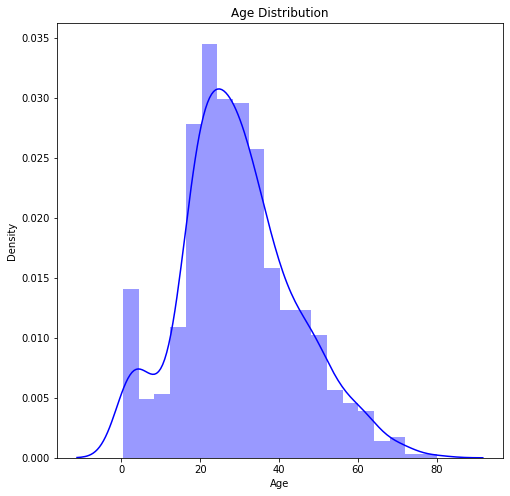

In [15]:
plot_distribution(train_data, "Age", "Age Distribution")

Aqui vemos que a maioria dos passageiros estava entre seus 20 e 40 anos de idade.

<AxesSubplot:xlabel='Age', ylabel='Count'>

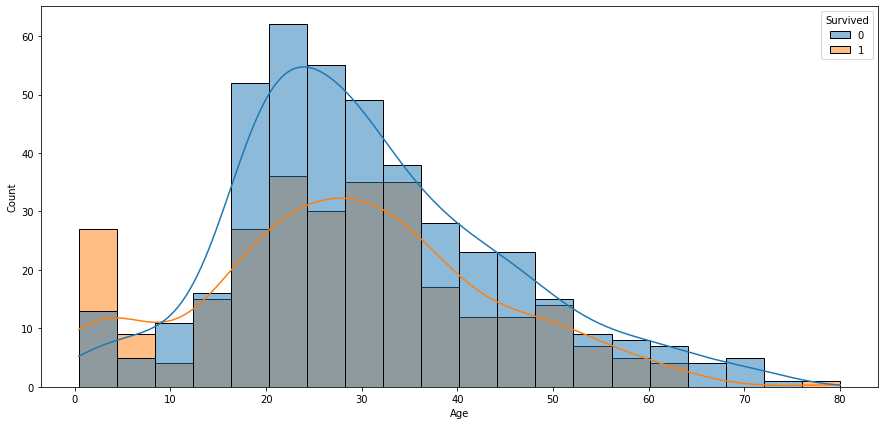

In [16]:
plt.figure(figsize = (15,7))
sns.histplot(data=train_data,x='Age',hue='Survived',kde=True)

Com o gráfico acima, vemos que houve uma taxa maior de sobrevivência para crianças até 10 anos de idade.

In [17]:
train_data.groupby(["Pclass"]).Age.mean().to_frame()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


E aqui vemos que a média de idade era maior para a primeira classe.

### Análise de Fare

Podemos analisar a distribuição do preço da passagem com relação ao número de passageiros; e também relação entre o preço da passagem e a classe ocupada pelo passageiro. Assim, podemos ver se ela segue o padrão do que foi analizado para a classe, ou se apresenta uma correlação diferente com a sobrevivência.

/home/carolps/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


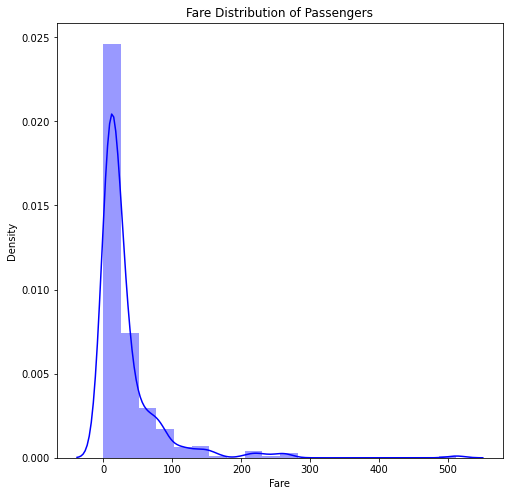

In [18]:
plot_distribution(train_data, "Fare", "Fare Distribution of Passengers")

In [19]:
train_data.groupby(["Pclass"]).Fare.mean().to_frame()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


Vemos através dos dois gráficos acima que a maior parte dos passageiros pagou valores baixos nas passagens e que a média do valor da passagem é bem mais alta para a primeira classe. Vemos então que passageiros que pagaram mais ocuparam a primeira classe, e que essa teve maior taxa de sobrevivência.

### Análise de Embarked

In [20]:
train_data["Embarked"].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


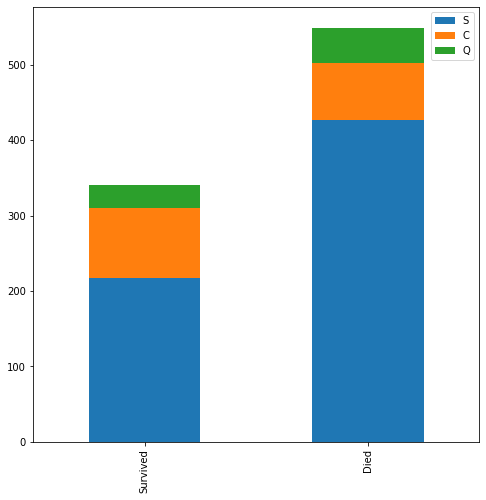

In [21]:
plot_bar_chart(train_data,"Embarked")

In [22]:
def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize = (7,7))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax= ax).set_title(title)


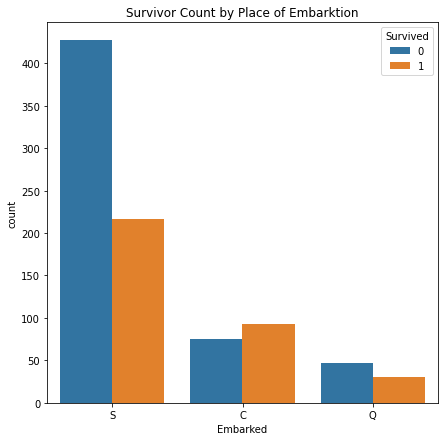

In [23]:
show_compare_countplot(train_data, "Embarked", "Survived", "Survivor Count by Place of Embarktion")

In [24]:
pd.pivot_table(train_data, index = "Survived", columns = "Embarked", values = "Ticket", aggfunc = "count")

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


É possível ver pelos gráficos acima que a maioria dos passageiros embarcou em Southampton e que a porcentagem de sobreviventes foi maior para os que embarcaram em Cherbourg, em relação às outras.

In [25]:
train_data.groupby(["Embarked", "Pclass"]).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

Analizando a relação entre o número de passageiros que embarcaram em cada classe, em cada cidade, vemos que embarcaram proporcionalmente mais passageiros da primeira classe, em relação às outras duas, em Cherbourg.

Isso pode indicar que não houve influência do local de embarque na taxa de sobrevivência e sim, mais uma vez, houve influência da classe dos passageiros.

### Análise do título do passageiro

A partir da coluna de nome do passageiro, podemos extrair o título social e analizar se há relação entre o título e a taxa de sobrevivência.

In [26]:
train_data_cp = train_data.copy()

re = '([A-Za-z]+)\.'
for data in train_data_cp['Name']:
    train_data_cp['Title'] = train_data_cp.Name.str.extract(re, expand=False)
train_data_cp.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Foram encontrados 17 títulos diferentes entre os passageiros. Analizando  a soma do número de sobreviventes, agrupados pelo título extraído, obtém-se:

In [27]:
train_data_cp.groupby(["Title"]).Survived.sum().to_frame()

,Survived
Title,
Capt,0
Col,1
Countess,1
Don,0
Dr,3
Jonkheer,0
Lady,1
Major,1
Master,23


In [28]:
pd.pivot_table(train_data_cp, index = "Survived", columns = "Title", values = "Ticket", aggfunc = "count")

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN
1,NaN,1.0,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0


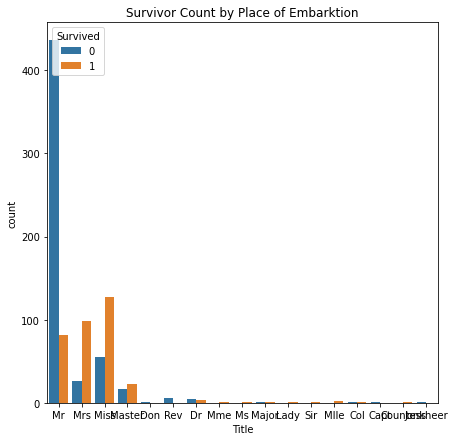

In [29]:
show_compare_countplot(train_data_cp, "Title", "Survived", "Survivor Count by Place of Embarktion")

Observa-se que passageiros com os tĩtulos **Miss**, **Mrs** e **Master** tiveram as maiores porcentagens de sobrevivência, ou seja, mulheres solteiras e casadas, e meninos ou homens jovens.

### Análise da quantidade de parentes do passageiro

É possivel analizar se o passageiro tinha outros membros da família dentro do embarcação e se isso teve influência na taxa de sobrevivência.
Podemos obter essa informação somando as colunas **SibSp** e **Parch**.

In [30]:
train_data_cp['FamilyMembers'] = (train_data_cp['SibSp'] + train_data_cp['Parch']).astype('int')

In [31]:
pd.pivot_table(train_data_cp, index = "Survived", columns = "FamilyMembers", values = "Ticket", aggfunc = "count")

FamilyMembers,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0
1,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN


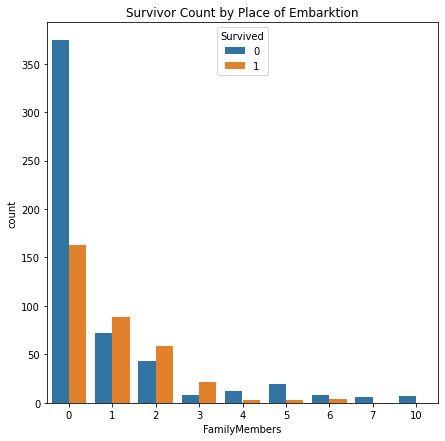

In [32]:
show_compare_countplot(train_data_cp, "FamilyMembers", "Survived", "Survivor Count by Place of Embarktion")

Segundo o gráfico acima, vemos que, proporcionalmente, a taxa de sobrevivência aumentou quando o passageiro tinha pelo menos um outro parente no navio: apenas 30% dos passageiros que embarcaram sozinhos sobreviveram; porém quando o passageiro tinha pelo menos um parente no navio, essa porcentagem aumenta para mais de 50%.

# Feature Engineering

Algumas das features do conjunto de dados podem ser facilmente descartadas, considerando sua correlacao com a taxa de sobrevivencia do passageiro, ou mesmo por não estar preenchida na maioria do conjunto de dados.

De acordo com a análise prévia, alguns dados podem ser bastantes relevantes na análise:
- Classe social do passageiro: passageiros de classe social mais alta tiveram prioridade no salvamento
- Sexo: mulheres tiveram prioridade no salvamento
- Idade: crianças também tiveram prioridade no salvamento
- Título: pessoas com título de Miss, Mrs e Master também tiveram prioridade
- Número de familiares: pessoas com pelo menos um familiar na embarcação, tiveram taxa de sobrevivência mais alta

In [33]:
complete_data = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

Considerando que a classe/titulo social do passageiro pode ter influenciado na prioridade dada ao seu salvamento, aqui cria-se uma nova feature (**Title**) no conjunto de dados a ser usado para treinamento, a partir de seu nome, extraindo-se apenas o título em questão.

In [34]:
re = '([A-Za-z]+)\.'
for data in complete_data['Name']:
    complete_data['Title'] = complete_data.Name.str.extract(re, expand=False)
complete_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

É útil analizar os sobreviventes de acordo com a faixa etária, ao invés da idade propriamente dita. Assim, conseguimos agrupar os passageiros por faixa de idade e enxergar melhor se houve preferencia por faixas específicas.

Aqui, cria-se uma nova feature chamada **AgeRange**, que atribui uma classe de idade, de acordo com a faixa em que a idade do passageiro se encaixa.

In [35]:
def age_class(age) :
    if age < 15 : 
        return "0"
    elif age < 30 :
        return "1"
    elif age < 45 :
        return "2"
    elif age < 60 :
        return "3"
    elif age < 60 :
        return "4"
    else :
        return "5"

complete_data['AgeRange'] = (complete_data['Age'].apply(age_class)).astype('int')

Aqui cria-se uma nova feature chamada **FamilyMembers**, que representa a soma dos outros passageiros que tinham grau de parentesco com o passageiro em questão.

In [36]:
complete_data['FamilyMembers'] = (complete_data['SibSp'] + complete_data['Parch']).astype('int')
complete_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeRange,FamilyMembers
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,2,0


Aqui é feita a transformação dos dados não numéricos para uma representação numérica, necessária para o treinamento. Além disso, é feito o preenchimento da feature *AgeRange* com o novo valor, dependendo do Título do passageiro.

In [37]:
def apply_age_range(title) :
    if (title == 'Miss' or title == 'Master') : 
        return "0"
    elif (title == 'Mrs' or title == 'Mr'):
        return "2"
    else :
        return "5"

In [38]:
complete_data['Sex'] = pd.factorize(complete_data['Sex'])[0]
complete_data['Embarked'] = pd.factorize(complete_data['Embarked'])[0]
complete_data['Cabin'] = pd.factorize(complete_data['Cabin'])[0]
complete_data['Title'] = pd.factorize(complete_data['Title'])[0]

#complete_data['AgeRange'] = complete_data['Title'].apply(lambda x: x.fillna(apply_age_range())).astype('int')

Neste momento, algumas features podem ser descartadas, por não demonstrarem alguma relação possível ou relevante com a sobrevivencia do passageiro, ou então porque deram origem a outras features mais relevantes na etapa de feature engineering.

Aqui foram removidos o nome da cabine, o local de embarque, o nome do passageiro, o numero de parentes e parceiros, o id do passageiro e o número do ticket.

In [39]:
complete_data = complete_data.drop(['Cabin', 'Embarked', 'Name', 'Parch', 'PassengerId', 'SibSp', 'Ticket', 'Fare', 'Age'], axis = 1)

train = complete_data.head(891)
test = complete_data.tail(418)

test.reset_index(drop=True)
test.drop(['Survived'], axis=1, inplace=True)

/home/carolps/.local/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
train.head()

,Pclass,Sex,Survived,Title,AgeRange,FamilyMembers
0,3,0,0.0,0,1,1
1,1,1,1.0,1,2,1
2,3,1,1.0,2,1,0
3,1,1,1.0,1,2,1
4,3,0,0.0,0,2,0


In [41]:
test.head()

,Pclass,Sex,Title,AgeRange,FamilyMembers
891,3,0,0,2,0
892,3,1,1,3,1
893,2,0,0,5,0
894,3,0,0,1,0
895,3,1,1,1,2


# Modeling

Aqui serão aplicados alguns modelos para o treinamento, sem configuração dos parâmetros de treinamento, para visualizar a acurácia dos dados selecionados, com o modelo puro.

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
train_df_len = 800

train = complete_data[:train_df_len]
x_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state = 42)

In [48]:
model = LogisticRegression(solver = "liblinear")
model.fit(x_train, y_train)
acc_log_train = round(model.score(x_train, y_train)*100, 2)
acc_log_test = round(model.score(x_test, y_test)*100 ,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 77.61
Testing Accuracy: % 83.71


### LGBM

In [50]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier()

In [51]:
y_pred = lgbm.predict(x_test)

In [52]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM accuracy score: {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

LightGBM accuracy score: 0.848


Este modelo teve uma acurácia bastante boa, considerando que não foram configurados os parâmetros de treinamento.

### XGBoost

In [53]:


xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [ ]:
y_pred = xgb_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print('XGBoost Model accuracy score: {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Este modelo também teve uma acurácia bastante boa.

### Multiple models

Aqui vou tentar aplicar o GridSearchCV, para automatizar o processo de ajuste dos parâmetros e testar outros modelos de treinamento.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
random_state = 42

classifiers = [SVC(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.1),
              GradientBoostingClassifier(random_state = random_state),
              LGBMClassifier(random_state = random_state)]

svc_param_grid = {"kernel": ["rbf"], "gamma": [0.001, 0.01, 0.1, 1], "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10], "min_samples_split": [2,3,10], "min_samples_leaf": [1,3,10],
                 "bootstrap": [False], "n_estimators": [100,300], "criterion": ["gini"]}

ada_param_grid = {"base_estimator__criterion": ["gini", "entropy"],
                 "base_estimator__splitter": ["best", "random"],
                 "algorithm": ["SAMME", "SAMME.R"],
                 "n_estimators": [1,2],
                 "learning_rate": [0.01, 0.1]}

gb_param_grid = {"loss": ["deviance"],
                "n_estimators": [100,300],
                "learning_rate": [0.1],
                "max_depth": [4, 8]}

lgbm_param_grid = {"learning_rate": [0.1], 
                   "max_depth": [None],
                   "n_estimators": [100,300]}

classifiers_param = [svc_param_grid, rf_param_grid, ada_param_grid, gb_param_grid, lgbm_param_grid]


In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grid = classifiers_param[i], cv = StratifiedKFold(n_splits = 10),
    scoring = "accuracy", n_jobs = -1, verbose = 1)
    
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means": cv_result, "ML Models": ["SVM",
                                                                               "RandomForestClassifier",                                                                               
                                                                               "AdaBoost",
                                                                               "GradientBoost",
                                                                               "LGBM"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

Os valores de acurácia obtidos para esses modelos foram de acordo com o esperado.